# Titanic datset analysis : 

### -       What factors made people more likely to survive?
### -       Predict if a passenger is a survivor or not given the traits

In [65]:
import pandas as pd
import numpy as np

%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


## Data Summary

In [66]:
df = pd.read_csv('titanic_data.csv')
print df.head(n=2)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C  


In [68]:
print "Summary of numerical variables : \n"
print df.describe()
print
print 'Summary of categorical variables : \n'
print df.describe(include = ['O'])
print

# Overall distribution of survivors:
by_survival = df.groupby(['Survived'], as_index=False)['PassengerId'].agg('count')
print "Total Survivors and Non-Survivors"
print by_survival
print '\nRatio of non_survivors/survivors: ' + str(by_survival['PassengerId'][0]/float(by_survival['PassengerId'][1]))

Summary of numerical variables : 

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Summary of categorical variables : 

        

## Data Pre-processing/Cleaning:

In [69]:
# Check formMissing values:

is_null_df = pd.isnull(df)

# Get sum of missing values for each variable:
print "MISSING VALUES TABLE \n"
print is_null_df.sum()

MISSING VALUES TABLE 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Notes:
1. From summary : No outliers in any of the numeric attributes
2. There are missing variables for Age, Cabin and Embarked. Cabin has more than 50% of missing variables. Age and Embarked has lesser missing variables which can be removed. 

In [70]:
# Check the distribution of 'Survived' class for data points with missing age
df_missing_age = df['Age'].dropna()

s_null_age = pd.isnull(df['Age'])
df_missing_age = df[s_null_age]
print df_missing_age.shape
print
print df_missing_age.describe()
print

by_survival = df_missing_age.groupby(['Survived'], as_index=False)['PassengerId'].agg('count')
print by_survival
print '\nRatio of non_survivors/survivors for missing age : ' + str(by_survival['PassengerId'][0]/float(by_survival['PassengerId'][1]))

(177, 12)

       PassengerId    Survived      Pclass  Age       SibSp       Parch  \
count   177.000000  177.000000  177.000000  0.0  177.000000  177.000000   
mean    435.581921    0.293785    2.598870  NaN    0.564972    0.180791   
std     250.552901    0.456787    0.763216  NaN    1.626316    0.534145   
min       6.000000    0.000000    1.000000  NaN    0.000000    0.000000   
25%     230.000000    0.000000    3.000000  NaN    0.000000    0.000000   
50%     452.000000    0.000000    3.000000  NaN    0.000000    0.000000   
75%     634.000000    1.000000    3.000000  NaN    0.000000    0.000000   
max     889.000000    1.000000    3.000000  NaN    8.000000    2.000000   

             Fare  
count  177.000000  
mean    22.158567  
std     31.874608  
min      0.000000  
25%      7.750000  
50%      8.050000  
75%     24.150000  
max    227.525000  

   Survived  PassengerId
0         0          125
1         1           52

Ratio of non_survivors/survivors for missing age : 2.403

In [71]:
# Check the distribution of 'Survived' class with data points for valid age
def is_null(x):
    if x == True:
        return False
    else:
        return True
    
# remove missing age:

s_null_age = pd.isnull(df['Age'])
s_valid_age = s_null_age.apply(is_null)

df_no_missing_age = df[s_valid_age]

print df_no_missing_age.shape
print
print df_no_missing_age.describe()
print

by_survival = df_no_missing_age.groupby(['Survived'], as_index=False)['PassengerId'].agg('count')
print by_survival
print '\nRatio of non_survivors/survivors for missing age : ' + str(by_survival['PassengerId'][0]/float(by_survival['PassengerId'][1]))

(714, 12)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   714.000000  714.000000  714.000000  714.000000  714.000000   
mean    448.582633    0.406162    2.236695   29.699118    0.512605   
std     259.119524    0.491460    0.838250   14.526497    0.929783   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     222.250000    0.000000    1.000000   20.125000    0.000000   
50%     445.000000    0.000000    2.000000   28.000000    0.000000   
75%     677.750000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    5.000000   

            Parch        Fare  
count  714.000000  714.000000  
mean     0.431373   34.694514  
std      0.853289   52.918930  
min      0.000000    0.000000  
25%      0.000000    8.050000  
50%      0.000000   15.741700  
75%      1.000000   33.375000  
max      6.000000  512.329200  

   Survived  PassengerId
0         0          424
1         1        

### Note: 
In the original data, the ratio of non-survivors/survivors is 1.6. On the other hand, data with missing ages has 125 passengers who died versus 52 survivors (a ratio of 2.45). And, for passengers whose age is known, 1.5 passengers died for each survivor.  

The age of more dead passengers remains unknown as opposed to the survivors. For the remaining analysis, I will remove the missing age data points, since the total class distribution doesn't change much after the missing ages are dropped.

Cabin: Too many Cabin variables are missing, so the variable will have to be omitted 

## Data Exploration

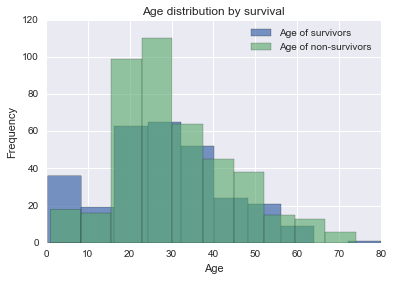

In [72]:
df_survivors = df_no_missing_age[df_no_missing_age['Survived'] == 1]
df_died = df_no_missing_age[df_no_missing_age['Survived'] == 0]

plt.hist(df_survivors['Age'], alpha=.75, label='Age of survivors')
plt.hist(df_died['Age'], alpha=0.60, label='Age of non-survivors')
plt.title('Age distribution by survival')
plt.legend(loc='upper right')
plt.ylabel('Frequency')
plt.xlabel('Age')

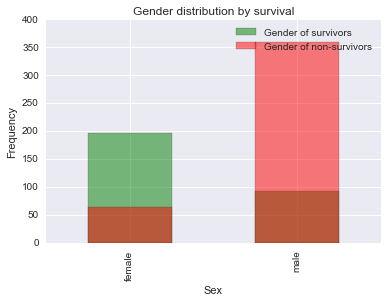

In [73]:
df_survivors.groupby('Sex').size().plot(kind='bar',alpha = .5,color = 'green', label = 'Gender of survivors')
df_died.groupby('Sex').size().plot(kind='bar',alpha =.5, color = 'red',label = 'Gender of non-survivors')
plt.title('Gender distribution by survival')
plt.legend(loc='upper right')
plt.ylabel('Frequency')
plt.xlabel('Sex')

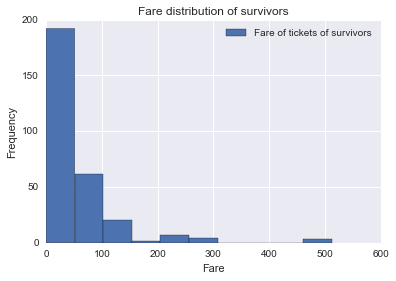

In [75]:
plt.hist(df_survivors['Fare'], label='Fare of tickets of survivors')
plt.title('Fare distribution of survivors')
plt.legend(loc='upper right')
plt.ylabel('Frequency')
plt.xlabel('Fare')

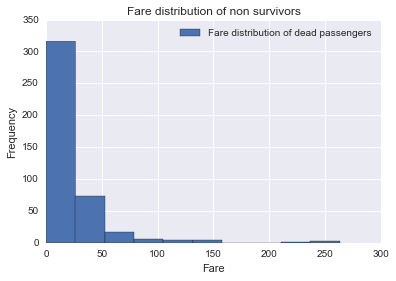

In [74]:
plt.hist(df_died['Fare'], label='Fare distribution of dead passengers')
plt.title('Fare distribution of non survivors')
plt.legend(loc='upper right')
plt.ylabel('Frequency')
plt.xlabel('Fare')

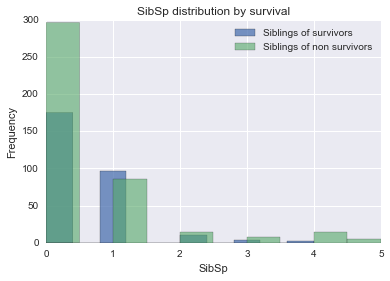

In [76]:
plt.hist(df_survivors['SibSp'], alpha=.75, label='Siblings of survivors')
plt.hist(df_died['SibSp'], alpha=0.60, label='Siblings of non survivors')
plt.title('SibSp distribution by survival')
plt.legend(loc='upper right')
plt.ylabel('Frequency')
plt.xlabel('SibSp')

## Correlation between variables

In [185]:
print df.corr()

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


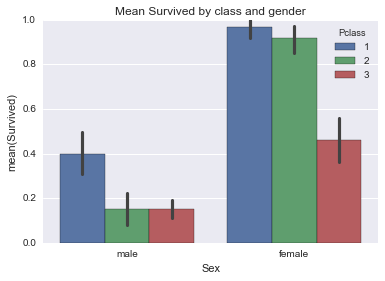

In [79]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df_no_missing_age)
plt.title('Mean Survived by class and gender')

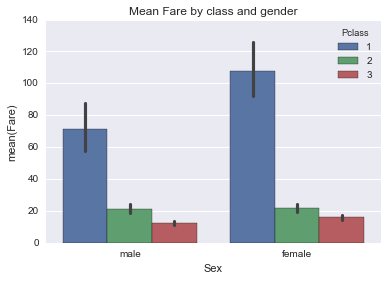

In [80]:
sns.barplot(x='Sex', y='Fare', hue='Pclass', data=df_no_missing_age)
plt.title('Mean Fare by class and gender')

    Age  SibSp  PassengerId  Survived  Pclass  Parch     Fare
0  0.42      0        804.0       1.0     3.0    1.0   8.5167
1  0.67      1        756.0       1.0     2.0    1.0  14.5000
2  0.75      2        557.5       1.0     3.0    1.0  19.2583
3  0.83      0         79.0       1.0     2.0    2.0  29.0000
4  0.83      1        832.0       1.0     2.0    1.0  18.7500



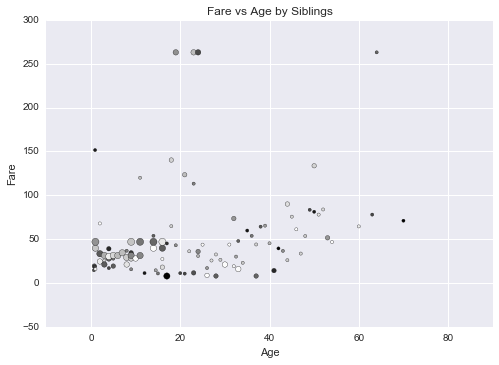

In [214]:
df_age_sex = df_no_missing_age.groupby(['Age','SibSp'],as_index = False).mean()
print df_age_sex.head()
print 

colors = np.random.rand(df_age_sex.shape[0])
area = df_age_sex['SibSp'] * 10

plt.scatter(df_age_sex['Age'], df_age_sex['Fare'], s = area, c = colors)
plt.title('Fare vs Age by Siblings')
plt.ylabel('Fare')
plt.xlabel('Age')

    Age  SibSp  PassengerId  Survived  Pclass  Parch     Fare
0  0.42      0        804.0       1.0     3.0    1.0   8.5167
1  0.67      1        756.0       1.0     2.0    1.0  14.5000
2  0.75      2        557.5       1.0     3.0    1.0  19.2583
3  0.83      0         79.0       1.0     2.0    2.0  29.0000
4  0.83      1        832.0       1.0     2.0    1.0  18.7500



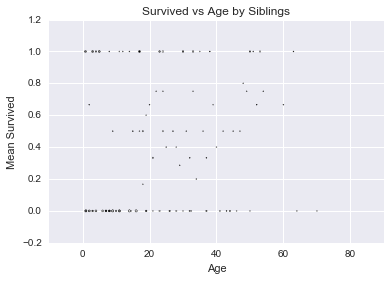

In [88]:
df_age_sex = df_no_missing_age.groupby(['Age','SibSp'],as_index = False).mean()
print df_age_sex.head()
print 

colors = np.random.rand(df_age_sex.shape[0])
area = df_age_sex['SibSp'] 

plt.scatter(df_age_sex['Age'], df_age_sex['Survived'], s = area, c = colors)
plt.title('Survived vs Age by Siblings')
plt.ylabel('Mean Survived')
plt.xlabel('Age')

    Age  SibSp  PassengerId  Survived  Pclass  Parch     Fare
0  0.42      0        804.0       1.0     3.0    1.0   8.5167
1  0.67      1        756.0       1.0     2.0    1.0  14.5000
2  0.75      2        557.5       1.0     3.0    1.0  19.2583
3  0.83      0         79.0       1.0     2.0    2.0  29.0000
4  0.83      1        832.0       1.0     2.0    1.0  18.7500



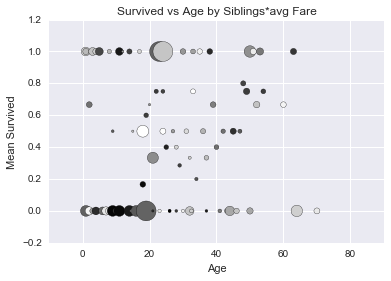

In [87]:
df_age_sex = df_no_missing_age.groupby(['Age','SibSp'],as_index = False).mean()
print df_age_sex.head()
print 

colors = np.random.rand(df_age_sex.shape[0])
area = df_age_sex['SibSp'] * (df_age_sex['Fare']/2)

plt.scatter(df_age_sex['Age'], df_age_sex['Survived'], s = area, c = colors)
plt.title('Survived vs Age by Siblings*avg Fare')
plt.ylabel('Mean Survived')
plt.xlabel('Age')

## Notes:
1. Age by Survival chart shows that more of the survivors were children or old passengers. All other age groups consist of more non-survivors - specially the age group 20-30. More of the survivors were women than men. The Fare distribution charts also reveal that anyone above 300 fare survived. Passengers who paid higher fares included more survivors than those who paid lower fares.

2. There are no strong correlation between any of the attributes. (Fare and Class has a -.54 correlation which is evident)

3. Plotting Age and class against mean survived - validates again that far more women survived than men and the number of first class survivors were almost four times of other classes for both men and women. Mean fare vs Age and Class reveals that more women paid higher fares, were in first class and more survived.

4. Next I explore if Siblings plays any part in survival of the passengers. The 'Fare vs Age by Siblings' chart plots the Fare vs Age and the size of the point is the siblings in that age group. We can see a bunch of children with siblings with low fares - possibly tickets were low priced for all children. The second chart 'Survived vs Age by Siblings' shows the mean survivors vs age group and the size of dot is the number of siblings - there isn't any specific difference based on number of siblings amongs survivors and non-survivors. However, plotting 'Survived vs Age by Siblings * avg Fare' that even children (and adults) who paid higher wages had more probability of survival with siblings.

From the exploration we know that children, women and first class passengers were highest amongst the survivors.


## Predict if a passenger is a survivor given the traits

In [91]:
# Fitting a decision tree and predict the accuracy of the model


# Convert categorical data to numerical data by creating dummy variables

df_no_missing_age_dummies = pd.concat([df_no_missing_age, 
                               pd.get_dummies(df_no_missing_age['Embarked']).rename(columns=lambda x: 'Embarked_' + str(x)), 
                               pd.get_dummies(df_no_missing_age['Sex']).rename(columns=lambda x: 'Sex_' + str(x))],
                                axis=1)
print df_no_missing_age_dummies.columns.values

df_no_missing_age_dummies = df_no_missing_age_dummies.drop(['Name','Cabin', 'Ticket','Sex','Embarked'], axis=1)
print
print df_no_missing_age_dummies.columns.values
print

df_no_missing_age_dummies_Y = df_no_missing_age_dummies['Survived']
df_no_missing_age_dummies_X = df_no_missing_age_dummies.drop('Survived',1)

print df_no_missing_age_dummies_Y.head()
print df_no_missing_age_dummies_X.columns.values


['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked' 'Embarked_C' 'Embarked_Q' 'Embarked_S'
 'Sex_female' 'Sex_male']

['PassengerId' 'Survived' 'Pclass' 'Age' 'SibSp' 'Parch' 'Fare'
 'Embarked_C' 'Embarked_Q' 'Embarked_S' 'Sex_female' 'Sex_male']

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
['PassengerId' 'Pclass' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked_C'
 'Embarked_Q' 'Embarked_S' 'Sex_female' 'Sex_male']


In [93]:
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(df_no_missing_age_dummies_X, df_no_missing_age_dummies_Y, test_size=0.33, random_state=42)

clfr = tree.DecisionTreeClassifier()
tree.fit = clfr.fit(X_train, y_train)

clfr.predict(df_data_test)
tree_accuracy = clfr.score(X_test, y_test, sample_weight=None)
print "Accuracy of a Decision Tree : " + str(tree_accuracy)


Accuracy of a Decision Tree : 0.716101694915


In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf.predict(df_data_test)
forest_accuracy = rf.score(X_test, y_test, sample_weight=None)
print "Accuracy of a Random Forest : " + str(forest_accuracy)


Accuracy of a Random Forest : 0.800847457627


#### Notes:
Fitting a decision tree gives 71.6 % accuracy of predicting the survivality of a passenger. Random Forests increase the accuracy to 80%.

## References 
1. http://matplotlib.org/api/pyplot_api.html
2. http://stackoverflow.com/questions/6871201/plot-two-histograms-at-the-same-time-with-matplotlib 
3. https://stanford.edu/~mwaskom/software/seaborn/tutorial/categorical.html
4. http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder
5. https://www.kaggle.com/c/titanic/forums/t/10433/best-way-to-include-categorial-data-in-the-training-set/55559
6. http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html